In [69]:
# Import Dependcies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [70]:
summer_df = pd.read_csv('Olympics_Data/summer.csv')
winter_df = pd.read_csv('Olympics_Data/winter.csv')
countries_df = pd.read_csv('Olympics_Data/dictionary.csv')

In [71]:
summer_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [72]:
winter_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [73]:
countries_df

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [74]:
summer_df['Season'] = 'Summer'
winter_df['Season'] = 'Winter'

In [75]:
olympic_df = pd.concat([summer_df, winter_df], ignore_index=True)

In [76]:
olympic_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


In [77]:
olympic_df.rename(columns = {"Country": "Code"}, inplace=True)
olympic_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


In [78]:
final_df = pd.merge(olympic_df, countries_df, on="Code", how="inner")
final_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,9844686.0,12363.54346
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary,9844686.0,12363.54346
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary,9844686.0,12363.54346
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Summer,Hungary,9844686.0,12363.54346
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Summer,Hungary,9844686.0,12363.54346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30563,1980,Lake Placid,Skiing,Alpine Skiing,"WENZEL, Hanni",LIE,Women,Giant Slalom,Gold,Winter,Liechtenstein,37531.0,NaN
30564,1980,Lake Placid,Skiing,Alpine Skiing,"WENZEL, Hanni",LIE,Women,Slalom,Gold,Winter,Liechtenstein,37531.0,NaN
30565,1984,Sarajevo,Skiing,Alpine Skiing,"WENZEL, Andreas",LIE,Men,Giant Slalom,Bronze,Winter,Liechtenstein,37531.0,NaN
30566,1984,Sarajevo,Skiing,Alpine Skiing,"KONZETT, Ursula",LIE,Women,Slalom,Bronze,Winter,Liechtenstein,37531.0,NaN


In [97]:
final_df = final_df.dropna()
final_df['Population'] = final_df['Population'].astype(int)
final_df['GDP per Capita'] = final_df['GDP per Capita'].round(2)
final_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,9844686,12363.54
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary,9844686,12363.54
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary,9844686,12363.54
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Summer,Hungary,9844686,12363.54
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Summer,Hungary,9844686,12363.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30554,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Summer,Guatemala,16342897,3903.48
30555,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Summer,Grenada,106825,9212.02
30556,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Summer,Botswana,2262485,6360.14
30557,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Summer,Cyprus,1165300,23242.84


In [80]:
print(final_df.columns)

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender',
       'Event', 'Medal', 'Season', 'Country', 'Population', 'GDP per Capita'],
      dtype='object')


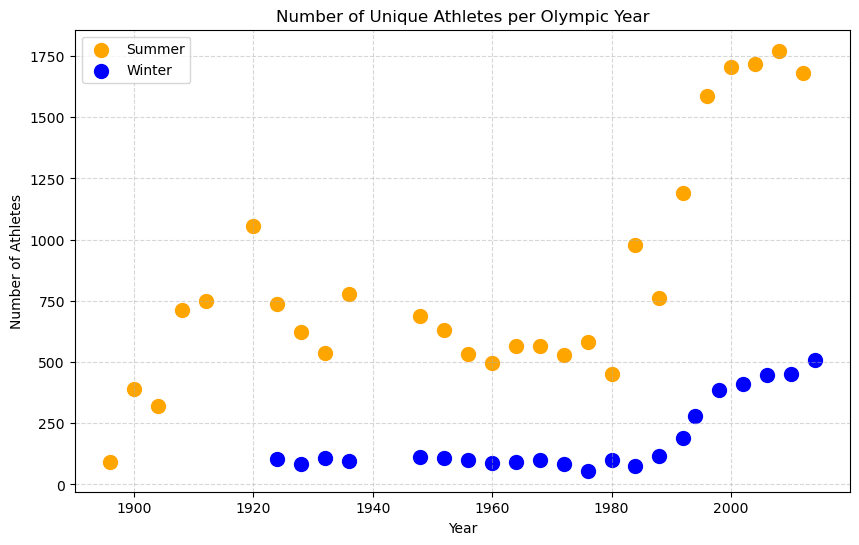

In [81]:
unique_athletes_per_year = final_df.groupby(['Year', 'Season'])['Athlete'].nunique().reset_index()

summer_data = unique_athletes_per_year[unique_athletes_per_year['Season'] == 'Summer']
winter_data = unique_athletes_per_year[unique_athletes_per_year['Season'] == 'Winter']

plt.figure(figsize=(10, 6))
plt.scatter(summer_data['Year'], summer_data['Athlete'], color='orange', marker='o', label='Summer', s=100, alpha=1)
plt.scatter(winter_data['Year'], winter_data['Athlete'], color='blue', marker='o', label='Winter', s=100, alpha=1)

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Unique Athletes per Olympic Year')

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend()

plt.show()

In [82]:
events_after_2000 = final_df[final_df['Year'] > 2000]['Sport'].unique()

print("Unique Events after 2000:")
print(len(events_after_2000))

Unique Events after 2000:
36


In [83]:
sports_1990_to_2010 = final_df[(final_df['Year'] >= 1990) & (final_df['Year'] <= 2010)]['Sport'].unique()

print("Unique Sports from 1990 to 2010:")
print(len(sports_1990_to_2010))

Unique Sports from 1990 to 2010:
35


In [84]:
events_1990_to_2010 = final_df[(final_df['Year'] >= 1990) & (final_df['Year'] <= 2010)]['Event'].unique()

print("Unique Events from 1990 to 2010:")
print(len(events_1990_to_2010))

Unique Events from 1990 to 2010:
325


In [85]:
sports_1960_to_1980 = final_df[(final_df['Year'] >= 1960) & (final_df['Year'] <= 1980)]['Sport'].unique()

print("Unique Sports from 1960 to 1980:")
print(len(sports_1960_to_1980))

Unique Sports from 1960 to 1980:
27


In [86]:
events_1960_to_1980 = final_df[(final_df['Year'] >= 1960) & (final_df['Year'] <= 1980)]['Event'].unique()

print("Unique Events from 1960 to 1980:")
print(len(events_1960_to_1980))

Unique Events from 1960 to 1980:
206


In [87]:
print(final_df['Event'].nunique())

733


In [88]:
print(final_df['Sport'].nunique())

48


In [89]:
print(final_df['Country'].nunique())

118


In [90]:
len(olympic_df)

36935

In [91]:
print(final_df['City'].nunique())

41


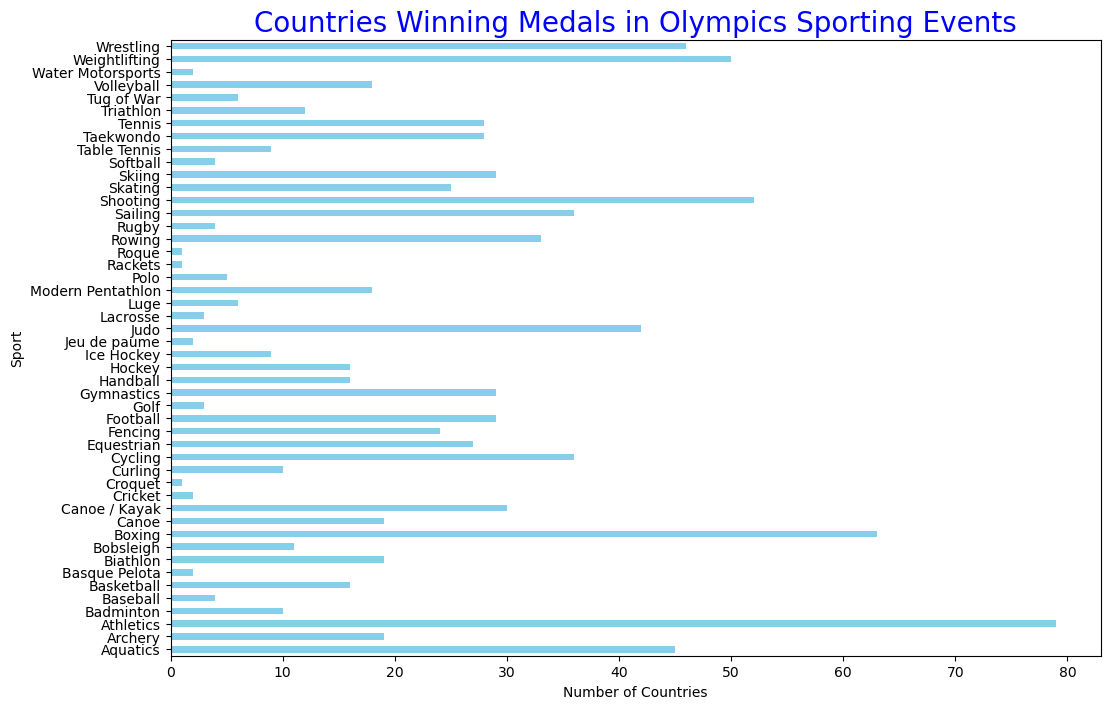

In [92]:
sport_countries = final_df.groupby('Sport')['Country'].nunique()

plt.figure(figsize=(12, 8))
sport_countries.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Countries')
plt.ylabel('Sport')
plt.title('Countries Winning Medals in Olympics Sporting Events', color='blue', fontsize=20)

plt.show()

In [93]:
athletics_df = final_df[final_df['Sport'] == 'Athletics']

num_countries_in_athletics = athletics_df['Country'].nunique()

print("Number of countries that won a medal in Athletics:", num_countries_in_athletics)

Number of countries that won a medal in Athletics: 79


In [94]:
athletics_df = final_df[final_df['Sport'] == 'Athletics']

num_unique_events = athletics_df['Event'].nunique()

print("Number of different events in Athletics:", num_unique_events)

Number of different events in Athletics: 56


In [95]:
medals_by_country = athletics_df.groupby('Country')['Medal'].count()

most_medals_country = medals_by_country.idxmax()
num_medals_most_country = medals_by_country.max()

print(f"Country with the most medals in Athletics: {most_medals_country}")
print(f"Number of medals won: {num_medals_most_country}")

Country with the most medals in Athletics: United States
Number of medals won: 994
